# Twitter EDA

### Import Dependencies

In [1]:
import pandas as pd
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt

import pickle # just in case

### Set file locations

In [2]:
# Raw data file for tweet text (input file)
tweet_text_file = '../data/twitter/twitter_text.csv'

# File for cleaned tweet text (input file)
clean_csv = '../data/twitter/twitter_data_cleaned.csv'

# File for cleaned tweet text (input file)
cleantext_csv = '../data/twitter/twitter_cleantext.csv'

### Read in the data

In [3]:
df = pd.read_csv(cleantext_csv)

In [4]:
df.head()

,tweet_id,full_text,clean_text
0,1.364223e+18,Here’s what's in the COVID relief package:\n \...,here’s whats in the covid relief package direc...
1,1.364381e+18,Will the National Endowment for the Arts be he...,will the national endowment for the arts be he...
2,1.364610e+18,"This is both anecdotal and early, but many lon...",this is both anecdotal and early but many long...
3,1.364727e+18,A Link to Professor Chossudovsky’s Analysis of...,a link to professor chossudovsky’s analysis of...
4,1.364727e+18,Children warned over hugging grandparents even...,children warned over hugging grandparents even...


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    51157 non-null  float64
 1   full_text   51157 non-null  object 
 2   clean_text  51136 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df.fillna(value=' ', inplace=True)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    51157 non-null  float64
 1   full_text   51157 non-null  object 
 2   clean_text  51157 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


### Sentiment analysis (by tweet)

In [8]:
# This takes a little while (<2 minutes)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['clean_text'].apply(pol)
df['subjectivity'] = df['clean_text'].apply(sub)
df

,tweet_id,full_text,clean_text,polarity,subjectivity
0,1.364223e+18,Here’s what's in the COVID relief package:\n \...,here’s whats in the covid relief package direc...,0.233333,0.766667
1,1.364381e+18,Will the National Endowment for the Arts be he...,will the national endowment for the arts be he...,0.000000,0.500000
2,1.364610e+18,"This is both anecdotal and early, but many lon...",this is both anecdotal and early but many long...,0.333333,0.480556
3,1.364727e+18,A Link to Professor Chossudovsky’s Analysis of...,a link to professor chossudovsky’s analysis of...,0.200000,0.200000
4,1.364727e+18,Children warned over hugging grandparents even...,children warned over hugging grandparents even...,0.007000,0.541000
...,...,...,...,...,...
51152,1.366553e+18,EU - GERMANY ....and the beat goes on.... Wher...,eu germany and the beat goes on where are the ...,-0.250000,0.250000
51153,1.366549e+18,@satyendrajain @ArvindKejriwal @DrKKAggarwal ...,vaccination of frontline officers is being del...,-0.031818,0.277273
51154,1.366547e+18,Do it the Coward and Liar way. Get vaccinated ...,do it the coward and liar way get vaccinated a...,0.000000,0.000000
51155,1.366544e+18,Trump urges supporters to get vaccinated again...,trump urges supporters to get vaccinated again...,0.000000,0.000000


### Try some plots

array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

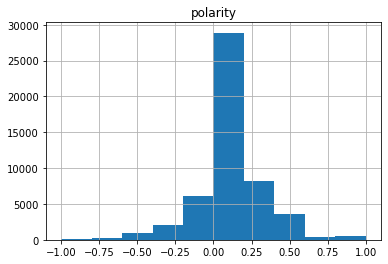

In [9]:
df.hist(column = 'polarity')

array([[<AxesSubplot:title={'center':'subjectivity'}>]], dtype=object)

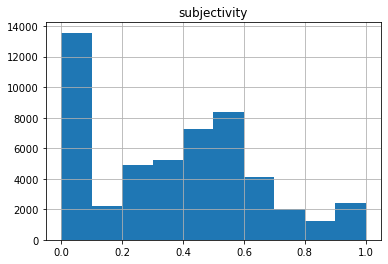

In [10]:
df.hist(column = 'subjectivity')

<AxesSubplot:xlabel='subjectivity', ylabel='polarity'>

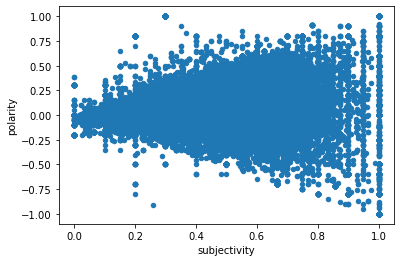

In [11]:
df.plot.scatter(x='subjectivity', y='polarity')

In [12]:
### Add in more features from the original dataset

In [13]:
df.drop('full_text', axis=1, inplace=True)

In [14]:
new_df = pd.read_csv(clean_csv)

In [15]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            51157 non-null  float64
 1   created_at          51157 non-null  object 
 2   full_text           51157 non-null  object 
 3   geo                 77 non-null     object 
 4   coordinates         77 non-null     object 
 5   place               1005 non-null   object 
 6   retweet_count       51157 non-null  int64  
 7   favorite_count      51157 non-null  int64  
 8   possibly_sensitive  51157 non-null  object 
 9   lang                51157 non-null  object 
 10  user_id             51157 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


In [16]:
# lost the datetime format in csv. Fix that
# new_df['created_at_datetime'] = pd.to_datetime(new_df['created_at_datetime'])

In [17]:
new_df = new_df.merge(df, how='left', on='tweet_id')

In [18]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51165 entries, 0 to 51164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            51165 non-null  float64
 1   created_at          51165 non-null  object 
 2   full_text           51165 non-null  object 
 3   geo                 77 non-null     object 
 4   coordinates         77 non-null     object 
 5   place               1005 non-null   object 
 6   retweet_count       51165 non-null  int64  
 7   favorite_count      51165 non-null  int64  
 8   possibly_sensitive  51165 non-null  object 
 9   lang                51165 non-null  object 
 10  user_id             51165 non-null  float64
 11  clean_text          51165 non-null  object 
 12  polarity            51165 non-null  float64
 13  subjectivity        51165 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.9+ MB


In [19]:
### More EDA plots with the added features

array([[<AxesSubplot:title={'center':'retweet_count'}>]], dtype=object)

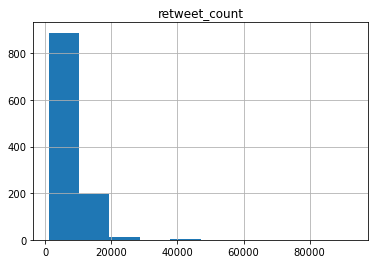

In [20]:
new_df.loc[new_df['retweet_count'] > 1000].hist(column = 'retweet_count')

array([[<AxesSubplot:title={'center':'favorite_count'}>]], dtype=object)

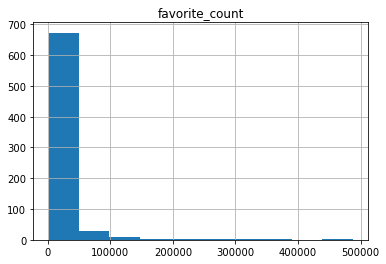

In [21]:
new_df.loc[new_df['favorite_count'] > 1000].hist(column = 'favorite_count')

<AxesSubplot:xlabel='subjectivity', ylabel='retweet_count'>

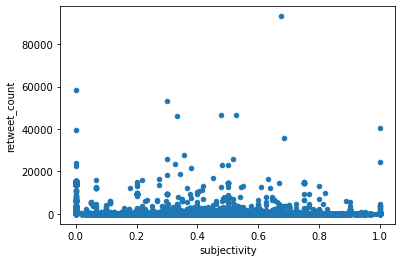

In [22]:
new_df.plot.scatter(x='subjectivity', y='retweet_count')

<AxesSubplot:xlabel='subjectivity', ylabel='retweet_count'>

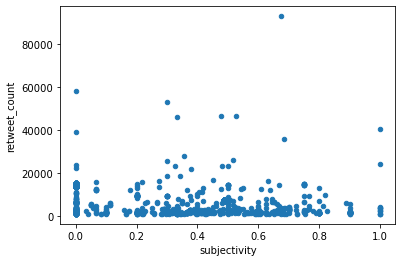

In [23]:
new_df.loc[new_df['retweet_count'] > 1000].plot.scatter(x='subjectivity', y='retweet_count')

In [24]:
new_df.describe()

,tweet_id,retweet_count,favorite_count,user_id,polarity,subjectivity
count,5.116500e+04,51165.000000,51165.000000,5.116500e+04,51165.000000,51165.000000
mean,1.365542e+18,144.967204,209.009088,3.922631e+17,0.089002,0.363054
std,8.389817e+14,1317.556547,4497.025876,5.454709e+17,0.229655,0.280364
min,1.363783e+18,0.000000,0.000000,1.033000e+03,-1.000000,0.000000
25%,1.364726e+18,0.000000,0.000000,1.116794e+08,0.000000,0.050000
50%,1.365451e+18,0.000000,0.000000,1.259368e+09,0.000505,0.393939
75%,1.366176e+18,1.000000,3.000000,9.794707e+17,0.200000,0.545000
max,1.366901e+18,93091.000000,487769.000000,1.366846e+18,1.000000,1.000000


In [25]:
new_df.loc[new_df['retweet_count'] > 1000].describe()

,tweet_id,retweet_count,favorite_count,user_id,polarity,subjectivity
count,1.106000e+03,1106.000000,1106.000000,1.106000e+03,1106.000000,1106.000000
mean,1.366395e+18,6128.376130,8176.896022,3.358493e+17,0.084097,0.290421
std,7.918975e+14,6597.622539,29430.077982,5.117228e+17,0.213115,0.280153
min,1.363851e+18,1001.000000,0.000000,6.814730e+05,-0.560000,0.000000
25%,1.366464e+18,1706.000000,0.000000,1.121258e+08,0.000000,0.000000
50%,1.366777e+18,3409.500000,0.000000,9.019150e+08,0.000000,0.288889
75%,1.366794e+18,7514.000000,4783.250000,8.239805e+17,0.100000,0.486667
max,1.366887e+18,93091.000000,487769.000000,1.363682e+18,1.000000,1.000000


<AxesSubplot:xlabel='polarity', ylabel='retweet_count'>

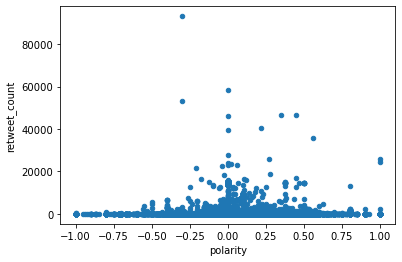

In [26]:
new_df.plot.scatter(x='polarity', y='retweet_count')

<AxesSubplot:xlabel='polarity', ylabel='retweet_count'>

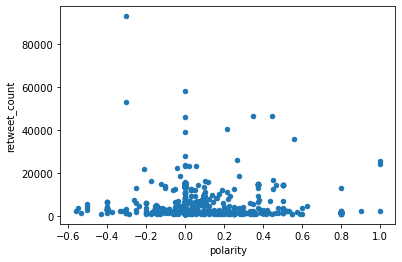

In [27]:
new_df.loc[new_df['retweet_count'] > 1000].plot.scatter(x='polarity', y='retweet_count')

<AxesSubplot:xlabel='subjectivity', ylabel='favorite_count'>

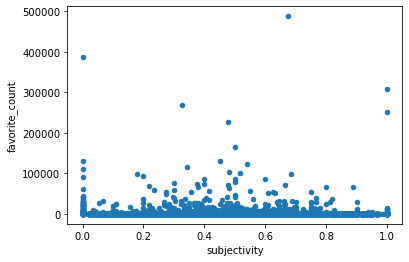

In [28]:
new_df.plot.scatter(x='subjectivity', y='favorite_count')

<AxesSubplot:xlabel='polarity', ylabel='favorite_count'>

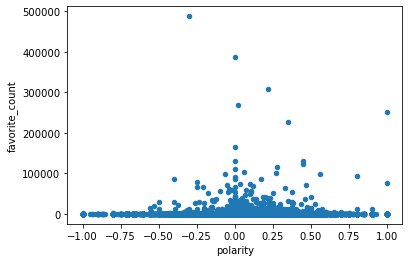

In [29]:
new_df.plot.scatter(x='polarity', y='favorite_count')

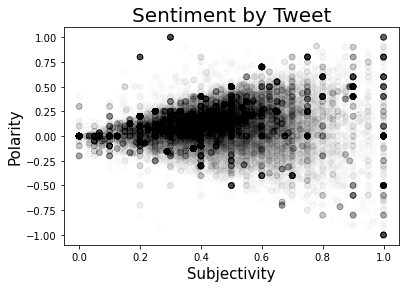

In [30]:
x = new_df.subjectivity
y = new_df.polarity
c = new_df.favorite_count 
import matplotlib.cm as cm
plt.scatter(x, y, c=c, alpha=0.01, cmap="gray")
# plt.xlim(0, 1) 
# plt.ylim(-1, 1) 
    
plt.title('Sentiment by Tweet', fontsize=20)
plt.xlabel('Subjectivity', fontsize=15)
plt.ylabel('Polarity', fontsize=15)

plt.show()

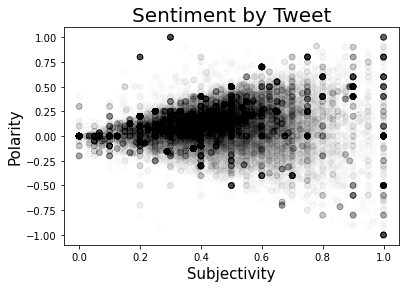

In [31]:
x = new_df.subjectivity
y = new_df.polarity
c = new_df.favorite_count 
import matplotlib.cm as cm
plt.scatter(x, y, c=c, alpha=0.01, cmap="gray")
# plt.xlim(0, 1) 
# plt.ylim(-1, 1) 
    
plt.title('Sentiment by Tweet', fontsize=20)
plt.xlabel('Subjectivity', fontsize=15)
plt.ylabel('Polarity', fontsize=15)

plt.show()

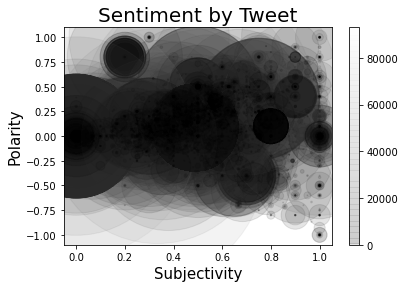

In [32]:
x = new_df.subjectivity
y = new_df.polarity
c = new_df.retweet_count 
import matplotlib.cm as cm
plt.scatter(x, y, c=c, s=c, alpha=0.1, cmap="gray")
# plt.xlim(0, 1) 
# plt.ylim(-1, 1) 

plt.colorbar();  # show color scale
    
plt.title('Sentiment by Tweet', fontsize=20)
plt.xlabel('Subjectivity', fontsize=15)
plt.ylabel('Polarity', fontsize=15)

plt.show()

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

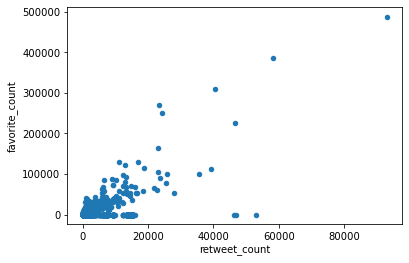

In [33]:
new_df.plot.scatter(x='retweet_count', y='favorite_count')

<AxesSubplot:xlabel='subjectivity', ylabel='polarity'>

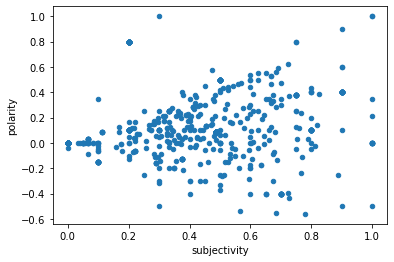

In [34]:
new_df.loc[new_df['retweet_count'] > 1000].plot.scatter(x='subjectivity', y='polarity')

### Sentiment analysis (by user_id)

In [35]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51165 entries, 0 to 51164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            51165 non-null  float64
 1   created_at          51165 non-null  object 
 2   full_text           51165 non-null  object 
 3   geo                 77 non-null     object 
 4   coordinates         77 non-null     object 
 5   place               1005 non-null   object 
 6   retweet_count       51165 non-null  int64  
 7   favorite_count      51165 non-null  int64  
 8   possibly_sensitive  51165 non-null  object 
 9   lang                51165 non-null  object 
 10  user_id             51165 non-null  float64
 11  clean_text          51165 non-null  object 
 12  polarity            51165 non-null  float64
 13  subjectivity        51165 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.9+ MB


#### Find users with most total retweets

In [36]:
users_df = new_df.groupby('user_id')[['retweet_count', 'favorite_count']].sum()
users_df = users_df.sort_values(by=['retweet_count'], ascending=False).reset_index()

In [37]:
top_retweeted_users_df = users_df.iloc[:30]
top_retweeted_users_df = top_retweeted_users_df.rename(columns={'retweet_count': 'total_retweets', 'favorite_count': 'total_favorites'})

In [38]:
top_retweeted_users_df

,user_id,total_retweets,total_favorites
0,8.427996e+07,133554,797091
1,1.349149e+18,93221,753826
2,1.382031e+08,58256,386383
3,1.358817e+18,52975,0
4,4.419640e+07,47804,520670
5,1.294121e+18,46778,0
6,1.883978e+07,46738,226235
7,1.128906e+09,46202,0
8,1.485297e+08,42106,156343
9,2.226802e+08,41018,84086


#### Collect and join all text available for a user_id

In [39]:
grouping_df = new_df[['user_id', 'clean_text']].copy()

In [40]:
grouping_df['clean_text'] = new_df[['user_id', 'clean_text']].groupby('user_id')['clean_text'].transform(lambda x: ','.join(x))
grouping_df.drop_duplicates(inplace=True)

In [41]:
grouping_df.reset_index(drop=True, inplace=True)

In [42]:
grouping_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     37010 non-null  float64
 1   clean_text  37010 non-null  object 
dtypes: float64(1), object(1)
memory usage: 578.4+ KB


In [43]:
grouping_df

,user_id,clean_text
0,2.950125e+07,here’s whats in the covid relief package direc...
1,1.201671e+18,will the national endowment for the arts be he...
2,3.842872e+07,this is both anecdotal and early but many long...
3,2.192010e+09,a link to professor chossudovsky’s analysis of...
4,2.868190e+09,children warned over hugging grandparents even...
...,...,...
37005,7.790395e+07,my father anoop chand gupta 92 years vaccinate...
37006,7.250928e+17,eu germany and the beat goes on where are the ...
37007,3.052016e+09,vaccination of frontline officers is being del...
37008,1.324768e+18,do it the coward and liar way get vaccinated a...


#### Merge the joined text back onto the top retweeted users

In [44]:
top_retweeted_users_df = top_retweeted_users_df.merge(grouping_df, how='left', on='user_id')

In [45]:
top_retweeted_users_df

,user_id,total_retweets,total_favorites,clean_text
0,8.427996e+07,133554,797091,hope everyone is alright had my wisdom teeth o...
1,1.349149e+18,93221,753826,the more people that get vaccinated the faster...
2,1.382031e+08,58256,386383,i don’t care what cruz said at cpac but i do c...
3,1.358817e+18,52975,0,i think covid’s biggest lesson is that a lot o...
4,4.419640e+07,47804,520670,new drug coming out called regretamine pop one...
5,1.294121e+18,46778,0,took my first dose of the covid19 vaccine at a...
6,1.883978e+07,46738,226235,took my first dose of the covid19 vaccine at a...
7,1.128906e+09,46202,0,here i describe a brief overview of how the pf...
8,1.485297e+08,42106,156343,the 13 trillion wealth gain by americas 660 bi...
9,2.226802e+08,41018,84086,there’s already an epidemic of hatred towards ...


#### Run sentiment analysis

In [46]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

top_retweeted_users_df['polarity'] = top_retweeted_users_df['clean_text'].apply(pol)
top_retweeted_users_df['subjectivity'] = top_retweeted_users_df['clean_text'].apply(sub)
top_retweeted_users_df

,user_id,total_retweets,total_favorites,clean_text,polarity,subjectivity
0,8.427996e+07,133554,797091,hope everyone is alright had my wisdom teeth o...,-0.370833,0.775000
1,1.349149e+18,93221,753826,the more people that get vaccinated the faster...,0.143288,0.469860
2,1.382031e+08,58256,386383,i don’t care what cruz said at cpac but i do c...,0.000000,0.000000
3,1.358817e+18,52975,0,i think covid’s biggest lesson is that a lot o...,-0.300000,0.300000
4,4.419640e+07,47804,520670,new drug coming out called regretamine pop one...,0.345455,0.551515
5,1.294121e+18,46778,0,took my first dose of the covid19 vaccine at a...,0.444444,0.527778
6,1.883978e+07,46738,226235,took my first dose of the covid19 vaccine at a...,0.346667,0.476667
7,1.128906e+09,46202,0,here i describe a brief overview of how the pf...,0.000000,0.333333
8,1.485297e+08,42106,156343,the 13 trillion wealth gain by americas 660 bi...,0.282143,0.557143
9,2.226802e+08,41018,84086,there’s already an epidemic of hatred towards ...,0.045000,0.383274


In [47]:
import requests

def user_id_finder(user_id):

    url = "https://tweeterid.com/ajax.php"

    payload="input=" + str(user_id).split(".")[0]
    headers = {
      'Connection': 'keep-alive',
      'sec-ch-ua': '"Google Chrome";v="89", "Chromium";v="89", ";Not A Brand";v="99"',
      'Accept': '*/*',
      'X-Requested-With': 'XMLHttpRequest',
      'sec-ch-ua-mobile': '?0',
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36',
      'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
      'Origin': 'https://tweeterid.com',
      'Sec-Fetch-Site': 'same-origin',
      'Sec-Fetch-Mode': 'cors',
      'Sec-Fetch-Dest': 'empty',
      'Referer': 'https://tweeterid.com/',
      'Accept-Language': 'en-US,en;q=0.9',
      'Cookie': '__utmz=116903043.1614978916.2.2.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utma=116903043.1078047140.1614877574.1614978916.1615061156.3; __utmc=116903043; __utmt=1; __utmb=116903043.4.10.1615061156'
    }

    response = requests.request("POST", url, headers=headers, data=payload)

    return response.text


In [48]:
user_id_finder(84279963.0)

'@Louis_Tomlinson'

In [49]:
top_retweeted_users_df['twitter_handle'] = top_retweeted_users_df['user_id'].apply(lambda x: user_id_finder(x))

In [50]:
top_retweeted_users_df

,user_id,total_retweets,total_favorites,clean_text,polarity,subjectivity,twitter_handle
0,8.427996e+07,133554,797091,hope everyone is alright had my wisdom teeth o...,-0.370833,0.775000,@Louis_Tomlinson
1,1.349149e+18,93221,753826,the more people that get vaccinated the faster...,0.143288,0.469860,error
2,1.382031e+08,58256,386383,i don’t care what cruz said at cpac but i do c...,0.000000,0.000000,@AOC
3,1.358817e+18,52975,0,i think covid’s biggest lesson is that a lot o...,-0.300000,0.300000,error
4,4.419640e+07,47804,520670,new drug coming out called regretamine pop one...,0.345455,0.551515,@elonmusk
5,1.294121e+18,46778,0,took my first dose of the covid19 vaccine at a...,0.444444,0.527778,error
6,1.883978e+07,46738,226235,took my first dose of the covid19 vaccine at a...,0.346667,0.476667,@narendramodi
7,1.128906e+09,46202,0,here i describe a brief overview of how the pf...,0.000000,0.333333,@WastwichBarnes
8,1.485297e+08,42106,156343,the 13 trillion wealth gain by americas 660 bi...,0.282143,0.557143,@RBReich
9,2.226802e+08,41018,84086,there’s already an epidemic of hatred towards ...,0.045000,0.383274,@GoAwayWithJae


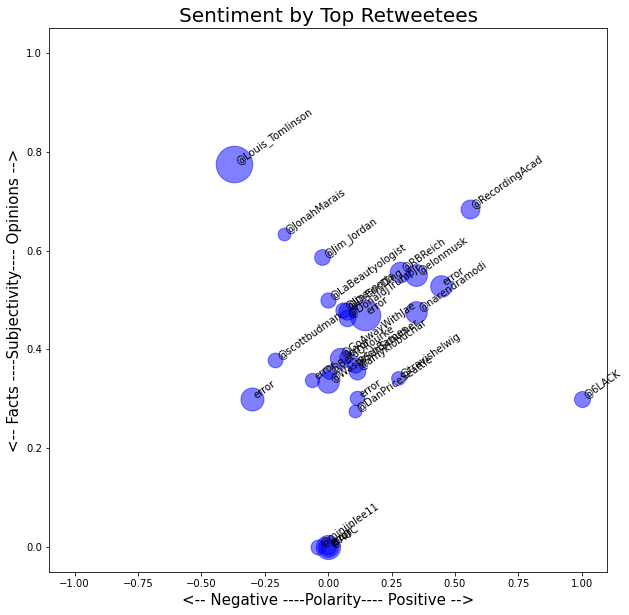

In [54]:
plt.rcParams['figure.figsize'] = [10, 10]

for index, user_id in enumerate(top_retweeted_users_df.index):
    x = top_retweeted_users_df.polarity.loc[user_id]
    y = top_retweeted_users_df.subjectivity.loc[user_id]
    s = top_retweeted_users_df.total_retweets.loc[user_id]/100
    plt.scatter(x, y, color='blue', s=s, alpha=0.5)
    plt.text(x+.001, y+.001, top_retweeted_users_df['twitter_handle'][index], fontsize=10, rotation=35)
    plt.ylim(-0.05, 1.05) 
    plt.xlim(-1.1, 1.1) 

    
plt.title('Sentiment by Top Retweetees', fontsize=20)
plt.xlabel('<-- Negative ----Polarity---- Positive -->', fontsize=15)
plt.ylabel('<-- Facts ----Subjectivity---- Opinions -->', fontsize=15)

plt.show()